# Experiments for the marker morphologies

## dataset sorting
### load in the data from kaggle

In [ ]:
import kagglehub
import subprocess
#to import the data we will use the open datasets library #we place the link copied from Kaggle into the parameter of the download function
#pathB = kagglehub.dataset_download("dextershepherd/tactip-alternative-morphology-b")
#pathnm = kagglehub.dataset_download("dextershepherd/no-marker-tactip-only-glare")
pathA = kagglehub.dataset_download("dextershepherd/tactip-morphology-a-texture")
print("Path to dataset files:", pathA)
result = subprocess.run(["mv", pathA, "/mnt/data0/drs25/data/"], capture_output=True, text=True)

# Download latest version
pathA="/mnt/data0/drs25/data/"

### convert it all

In [2]:
from convert.convert_data import *
pathA="/mnt/data0/drs25/data/"
save_path="/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/"
final_data,final_labels=load_files_memory_efficient(pathA+"/")
#result = subprocess.run(["rm -f", pathA], capture_output=True, text=True)
#final_data=np.load(pathnm+"/X_data_nomarker.npz")['arr_0']
#final_labels=np.load(pathnm+"/y_data_nomarker.npz")['arr_0']
import numpy as np
np.save(save_path+"X_data_morphoholyA",final_data)
np.save(save_path+"y_data_morphoholyA",final_labels)

{'carpet': 0, 'lacedmatt': 1, 'wool': 2, 'cork': 3, 'felt': 4, 'longcarpet': 5, 'cotton': 6, 'plastic': 7, 'flat': 8, 'foamf': 9, 'foamg': 10, 'bubble': 11, 'foame': 12, 'jeans': 13, 'leather': 14} []


IndexError: list index out of range

### Load

In [11]:
import numpy as np
save_path="/mnt/data0/drs25/data/optical-tactile-dataset-for-textures/"

XB=np.load(save_path+"X_data_morphoholyA.npy").astype(np.uint8)#.reshape((41*200,20,355,328))
yB=np.load(save_path+"y_data_morphoholyA.npy").astype(np.uint8)#.reshape((-1,1))
print(XB.shape)

(4600, 20, 355, 328)


In [12]:
mask = np.any(XB != 0, axis=(1, 2, 3))
XB = XB[mask]
yB = yB[mask]
print(XB.shape)
mask = np.any(XB != 1, axis=(1, 2, 3))
XB = XB[mask]
yB = yB[mask]
print(XB.shape)

(2300, 20, 355, 328)
(2300, 20, 355, 328)


In [6]:
print(XB.shape,yB.shape)

(3000, 20, 110, 120) (3000,)


### Validate 

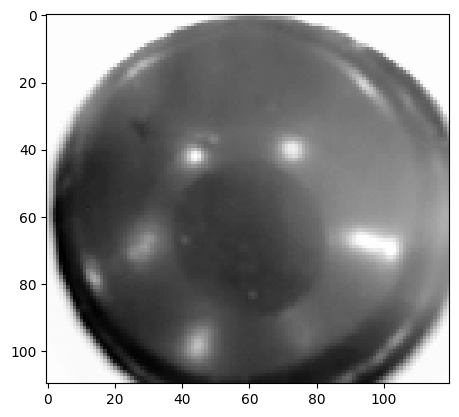

[5 5 5 ... 9 9 9]


In [7]:
import matplotlib.pyplot as plt

plt.imshow(XB[0][0],cmap="gray")
plt.show()
print(yB)

## modelling

In [9]:
import torch
torch.cuda.empty_cache()
from models import *
from data_loader import * 
from data_format import *
from datapath import *
class data_example(loaded):
    def __init__(self,x,y):
        self.X=x.copy()
        self.y=y.copy()
XB_accuracy=[]

data=data_example(XB[:4000,:18:2,:,:],yB)
data.resize(0.6)
data.applySobel()
try:
    XB_accuracy=list(np.asarray(np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XN0_accuracy_10.npy")))
    last_point=len(XB_accuracy)
except:
    last_point=0
print("----",last_point)

for i in range(last_point,10):
    try:
        del train_loader,test_loader #housekeeping
    except:
        pass
    torch.cuda.empty_cache()
    train_loader,test_loader=org_data(data,(len(data.X),1,9*data.X.shape[-2],data.X.shape[-1]))
    model,history=run(train_loader,0,9,num_epochs = 100)
    XB_accuracy.append([calc(model,test_loader),calc(model,train_loader)])
    np.save("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XN0_accuracy_10",np.array(XB_accuracy))

XB_accuracy=np.array(XB_accuracy)

np.save("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XN0_accuracy_10",XB_accuracy)

---- 10
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0575
Epoch [11/100], Step [48/48], Loss: 121.0958
Epoch [21/100], Step [48/48], Loss: 41.7227
Epoch [31/100], Step [48/48], Loss: 17.6156
Epoch [41/100], Step [48/48], Loss: 8.9558
Epoch [51/100], Step [48/48], Loss: 5.6709
Epoch [61/100], Step [48/48], Loss: 3.8185
Epoch [71/100], Step [48/48], Loss: 2.4383
Epoch [81/100], Step [48/48], Loss: 1.5549
Epoch [91/100], Step [48/48], Loss: 0.8738
Finished Training
Accuracy: 98.31694717547074 %
Accuracy: 99.1625348943794 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9948
Epoch [11/100], Step [48/48], Loss: 97.6976
Epoch [21/100], Step [48/48], Loss: 37.4765
Epoch [31/100], Step [48/48], Loss: 18.1797
Epoch [41/100], Step [48/48], Loss: 10.1112
Epoch [51/100], Step [48/48], Loss: 6.8871
Epoch [61/100], Step [48/48], Loss: 4.6148
Epoch [71/100], Step [48/48], Loss: 3.3180
Epoch [81/100], Step [48/48], Loss: 2.2444
Epoch [91/100], Step [48/48], Loss: 1.2764
Finished Training
Accuracy: 99.81669721713048 %
Accuracy: 99.32919461689097 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0695
Epoch [11/100], Step [48/48], Loss: 128.7337
Epoch [21/100], Step [48/48], Loss: 77.5933
Epoch [31/100], Step [48/48], Loss: 28.5998
Epoch [41/100], Step [48/48], Loss: 14.0797
Epoch [51/100], Step [48/48], Loss: 8.2876
Epoch [61/100], Step [48/48], Loss: 5.5972
Epoch [71/100], Step [48/48], Loss: 3.8555
Epoch [81/100], Step [48/48], Loss: 2.6421
Epoch [91/100], Step [48/48], Loss: 1.2770
Finished Training
Accuracy: 99.31678053657723 %
Accuracy: 99.53751927003042 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9579
Epoch [11/100], Step [48/48], Loss: 110.0043
Epoch [21/100], Step [48/48], Loss: 40.0674
Epoch [31/100], Step [48/48], Loss: 17.9752
Epoch [41/100], Step [48/48], Loss: 10.7425
Epoch [51/100], Step [48/48], Loss: 6.9822
Epoch [61/100], Step [48/48], Loss: 4.8617
Epoch [71/100], Step [48/48], Loss: 2.6969
Epoch [81/100], Step [48/48], Loss: 2.3542
Epoch [91/100], Step [48/48], Loss: 1.6694
Finished Training
Accuracy: 99.48341943009498 %
Accuracy: 99.82917378442565 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9791
Epoch [11/100], Step [48/48], Loss: 126.2596
Epoch [21/100], Step [48/48], Loss: 57.3648
Epoch [31/100], Step [48/48], Loss: 29.2725
Epoch [41/100], Step [48/48], Loss: 15.6609
Epoch [51/100], Step [48/48], Loss: 9.5057
Epoch [61/100], Step [48/48], Loss: 6.3779
Epoch [71/100], Step [48/48], Loss: 5.0189
Epoch [81/100], Step [48/48], Loss: 3.2351
Epoch [91/100], Step [48/48], Loss: 2.1166
Finished Training
Accuracy: 99.31678053657723 %
Accuracy: 99.82917378442565 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9381
Epoch [11/100], Step [48/48], Loss: 103.9806
Epoch [21/100], Step [48/48], Loss: 38.2169
Epoch [31/100], Step [48/48], Loss: 17.3910
Epoch [41/100], Step [48/48], Loss: 10.0341
Epoch [51/100], Step [48/48], Loss: 6.7303
Epoch [61/100], Step [48/48], Loss: 4.0266
Epoch [71/100], Step [48/48], Loss: 3.3106
Epoch [81/100], Step [48/48], Loss: 1.9432
Epoch [91/100], Step [48/48], Loss: 1.1129
Finished Training
Accuracy: 99.65005832361273 %
Accuracy: 99.99583350693722 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0018
Epoch [11/100], Step [48/48], Loss: 128.0830
Epoch [21/100], Step [48/48], Loss: 65.4874
Epoch [31/100], Step [48/48], Loss: 29.7112
Epoch [41/100], Step [48/48], Loss: 15.7688
Epoch [51/100], Step [48/48], Loss: 9.5225
Epoch [61/100], Step [48/48], Loss: 6.3038
Epoch [71/100], Step [48/48], Loss: 4.4601
Epoch [81/100], Step [48/48], Loss: 3.1352
Epoch [91/100], Step [48/48], Loss: 2.3125
Finished Training
Accuracy: 98.65022496250624 %
Accuracy: 98.91254531061206 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0040
Epoch [11/100], Step [48/48], Loss: 116.6256
Epoch [21/100], Step [48/48], Loss: 40.1505
Epoch [31/100], Step [48/48], Loss: 17.5113
Epoch [41/100], Step [48/48], Loss: 10.0449
Epoch [51/100], Step [48/48], Loss: 6.1522
Epoch [61/100], Step [48/48], Loss: 4.0587
Epoch [71/100], Step [48/48], Loss: 2.8865
Epoch [81/100], Step [48/48], Loss: 1.9800
Epoch [91/100], Step [48/48], Loss: 1.5527
Finished Training
Accuracy: 99.31678053657723 %
Accuracy: 99.82917378442565 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 129.9363
Epoch [11/100], Step [48/48], Loss: 95.9567
Epoch [21/100], Step [48/48], Loss: 41.2980
Epoch [31/100], Step [48/48], Loss: 20.4947
Epoch [41/100], Step [48/48], Loss: 11.8482
Epoch [51/100], Step [48/48], Loss: 7.6267
Epoch [61/100], Step [48/48], Loss: 5.3991
Epoch [71/100], Step [48/48], Loss: 3.3928
Epoch [81/100], Step [48/48], Loss: 2.4133
Epoch [91/100], Step [48/48], Loss: 2.5911
Finished Training
Accuracy: 99.98333611064822 %
Accuracy: 99.87083871505355 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0003
Epoch [11/100], Step [48/48], Loss: 107.4870
Epoch [21/100], Step [48/48], Loss: 42.4723
Epoch [31/100], Step [48/48], Loss: 20.2565
Epoch [41/100], Step [48/48], Loss: 11.6392
Epoch [51/100], Step [48/48], Loss: 7.5316
Epoch [61/100], Step [48/48], Loss: 4.9702
Epoch [71/100], Step [48/48], Loss: 3.9848
Epoch [81/100], Step [48/48], Loss: 2.6354
Epoch [91/100], Step [48/48], Loss: 1.7498
Finished Training
Accuracy: 99.48341943009498 %
Accuracy: 99.87083871505355 %
LOADED DATASET...
Memory left 23.59 GB
(3000, 9, 66, 72) (3000, 1, 594, 72)
Using 0.96 GB
torch.Size([3000, 1, 594, 72])
torch.Size([3000, 15])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [48/48], Loss: 130.0221
Epoch [11/100], Step [48/48], Loss: 115.8643
Epoch [21/100], Step [48/48], Loss: 44.0536
Epoch [31/100], Step [48/48], Loss: 20.3903
Epoch [41/100], Step [48/48], Loss: 10.8387
Epoch [51/100], Step [48/48], Loss: 6.8594
Epoch [61/100], Step [48/48], Loss: 4.6850
Epoch [71/100], Step [48/48], Loss: 2.6410
Epoch [81/100], Step [48/48], Loss: 2.2402
Epoch [91/100], Step [48/48], Loss: 1.5238
Finished Training
Accuracy: 99.65005832361273 %
Accuracy: 99.91250364568144 %


## evaluation

In [28]:
XB_=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XA_accuracy_10.npy")[1:]
print(XB_)
Av_XB_test=np.average(XB_,axis=0)[0]
Av_XB_train=np.average(XB_,axis=0)[1]
std_XB_test=np.std(XB_[:,0])
print("Average XA test:",Av_XB_test)
print("Average XA train:",Av_XB_train)
print(f"std XB test:{std_XB_test:.5}")


[[0.97587481 0.99233737]
 [0.98022169 0.97657736]
 [0.96066073 0.97820771]
 [0.98022169 0.98581599]
 [0.95196696 0.9581001 ]
 [0.97804825 0.98581599]
 [0.97370137 0.97603391]
 [0.97152793 0.98690289]
 [0.97152793 0.98690289]]
Average XA test: 0.9715279287111497
Average XA train: 0.9807438001557887
std XB test:0.008932


In [6]:
np.unique(data.y)

array([ 3,  4,  6,  8,  9, 10, 11, 12], dtype=uint8)

## Map

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


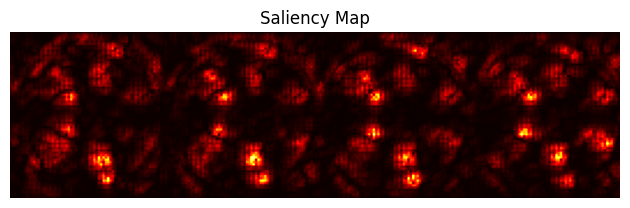

In [10]:
data=data_example(XB[0:10,:18:2,:,:],yB)
data.resize(0.6)
data.applySobel()
images = data.X.reshape((len(data.X),1,9*data.X.shape[-2],data.X.shape[-1]))
images=(images-np.min(images))/(np.max(images)-np.min(images))
input_tensor = torch.tensor(images.astype(np.float64)).clone().detach()
input_tensor.requires_grad = True

output = model(input_tensor.float().to(device))
print(output.cpu().argmax(dim=1))
target_class = output.cpu().argmax(dim=1)[0].item() 

model.zero_grad()
output[0, target_class].backward()
saliency = input_tensor.grad.data.abs()

import matplotlib.pyplot as plt

saliency_map = saliency.squeeze().max(dim=0)[0].numpy()  # collapse RGB
plt.imshow(saliency_map.T[:,data.X.shape[-2]:data.X.shape[-2]*5], cmap='hot')
plt.axis('off')
plt.title('Saliency Map')
plt.tight_layout()
plt.savefig("/its/home/drs25/RoboSkin/Code/NewRigExperiments/images/0_MAP.pdf")
plt.show()

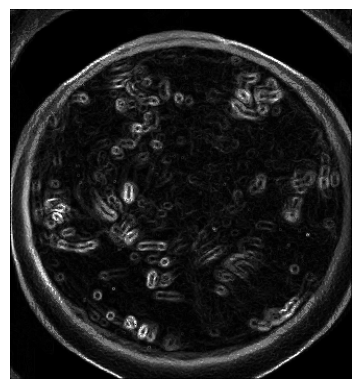

In [22]:
from models import *
from data_loader import * 
from data_format import *
class data_example(loaded):
    def __init__(self,x,y):
        self.X=x.copy()
        self.y=y.copy()
data=data_example(XB[0:10,:7,:,:],yB)
data.applySobel()
plt.imshow(data.X[0][0],cmap="gray")
plt.axis("off")
plt.savefig("/its/home/drs25/RoboSkin/Code/NewRigExperiments/images/0.png")
plt.show()

## resolution 

In [13]:
import torch
torch.cuda.empty_cache()
from models import *
from data_loader import * 
from data_format import *
from datapath import *
class data_example(loaded):
    def __init__(self,x,y):
        self.X=x.copy()
        self.y=y.copy()
XB_accuracy=[]

filename="XA_accuracy_res.npy"
try:
    XB_accuracy=list(np.asarray(np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/"+filename)))
    last_point=len(XB_accuracy)
except:
    last_point=0
print("----",last_point)

for res in np.arange(0.05,1,0.05):
    a=[]
    data=data_example(XB[:4000,:18:2,:,:],yB)
    data.resize(res)
    data.applySobel()
    for i in range(5):
        try:
            del train_loader,test_loader #housekeeping
        except:
            pass
        torch.cuda.empty_cache()
        train_loader,test_loader=org_data(data,(len(data.X),1,9*data.X.shape[-2],data.X.shape[-1]))
        model,history=run(train_loader,0,9,num_epochs = 100)
        a.append([calc(model,test_loader),calc(model,train_loader)])
    XB_accuracy.append(a)
    np.save("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/"+filename,np.array(XB_accuracy))

XB_accuracy=np.array(XB_accuracy)

np.save("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/"+filename,XB_accuracy)

---- 0
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 92.0418


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.7190
Epoch [21/100], Step [37/37], Loss: 91.4662
Epoch [31/100], Step [37/37], Loss: 91.1841
Epoch [41/100], Step [37/37], Loss: 90.7806
Epoch [51/100], Step [37/37], Loss: 90.0040
Epoch [61/100], Step [37/37], Loss: 87.6626
Epoch [71/100], Step [37/37], Loss: 77.3893
Epoch [81/100], Step [37/37], Loss: 59.3416
Epoch [91/100], Step [37/37], Loss: 42.1868
Finished Training
Accuracy: 69.33275374918496 %
Accuracy: 69.72447149611435 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 91.9883


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.6408
Epoch [21/100], Step [37/37], Loss: 91.3445
Epoch [31/100], Step [37/37], Loss: 90.9428
Epoch [41/100], Step [37/37], Loss: 90.2632
Epoch [51/100], Step [37/37], Loss: 88.6267
Epoch [61/100], Step [37/37], Loss: 82.7185
Epoch [71/100], Step [37/37], Loss: 65.9493
Epoch [81/100], Step [37/37], Loss: 49.4436
Epoch [91/100], Step [37/37], Loss: 35.9087
Finished Training
Accuracy: 65.42056074766354 %
Accuracy: 71.0830933101462 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 92.0160


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.8163
Epoch [21/100], Step [37/37], Loss: 91.6564
Epoch [31/100], Step [37/37], Loss: 91.5136
Epoch [41/100], Step [37/37], Loss: 91.3608
Epoch [51/100], Step [37/37], Loss: 91.1715
Epoch [61/100], Step [37/37], Loss: 90.9145
Epoch [71/100], Step [37/37], Loss: 90.4626
Epoch [81/100], Step [37/37], Loss: 89.4871
Epoch [91/100], Step [37/37], Loss: 86.7092
Finished Training
Accuracy: 30.428167789610956 %
Accuracy: 30.32443888919081 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 91.8556


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.5805
Epoch [21/100], Step [37/37], Loss: 91.3794
Epoch [31/100], Step [37/37], Loss: 91.1851
Epoch [41/100], Step [37/37], Loss: 90.9380
Epoch [51/100], Step [37/37], Loss: 90.5493
Epoch [61/100], Step [37/37], Loss: 89.8264
Epoch [71/100], Step [37/37], Loss: 87.9667
Epoch [81/100], Step [37/37], Loss: 81.4274
Epoch [91/100], Step [37/37], Loss: 67.6980
Finished Training
Accuracy: 47.59834818517713 %
Accuracy: 50.86680071735232 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 17, 16) (2300, 1, 153, 16)
Using 0.04 GB
torch.Size([2300, 1, 153, 16])
torch.Size([2300, 12])
Epoch [1/100], Step [37/37], Loss: 92.0913


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [11/100], Step [37/37], Loss: 91.6489
Epoch [21/100], Step [37/37], Loss: 91.3048
Epoch [31/100], Step [37/37], Loss: 90.9229
Epoch [41/100], Step [37/37], Loss: 90.3841
Epoch [51/100], Step [37/37], Loss: 89.2584
Epoch [61/100], Step [37/37], Loss: 85.3618
Epoch [71/100], Step [37/37], Loss: 70.8588
Epoch [81/100], Step [37/37], Loss: 54.9341
Epoch [91/100], Step [37/37], Loss: 36.8571
Finished Training
Accuracy: 72.37557052814606 %
Accuracy: 75.48502798760937 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9944
Epoch [11/100], Step [37/37], Loss: 91.4479
Epoch [21/100], Step [37/37], Loss: 90.9229
Epoch [31/100], Step [37/37], Loss: 89.6730
Epoch [41/100], Step [37/37], Loss: 82.2952
Epoch [51/100], Step [37/37], Loss: 55.5956
Epoch [61/100], Step [37/37], Loss: 32.7172
Epoch [71/100], Step [37/37], Loss: 22.8145
Epoch [81/100], Step [37/37], Loss: 17.6907
Epoch [91/100], Step [37/37], Loss: 15.3150
Finished Training
Accuracy: 86.7202782003912 %
Accuracy: 84.72365632302593 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9659
Epoch [11/100], Step [37/37], Loss: 91.3467
Epoch [21/100], Step [37/37], Loss: 90.6060
Epoch [31/100], Step [37/37], Loss: 88.6098
Epoch [41/100], Step [37/37], Loss: 74.3571
Epoch [51/100], Step [37/37], Loss: 46.6355
Epoch [61/100], Step [37/37], Loss: 26.7391
Epoch [71/100], Step [37/37], Loss: 19.7789
Epoch [81/100], Step [37/37], Loss: 15.8864
Epoch [91/100], Step [37/37], Loss: 13.0074
Finished Training
Accuracy: 90.63247120191262 %
Accuracy: 88.90821151024402 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8271
Epoch [11/100], Step [37/37], Loss: 91.3861
Epoch [21/100], Step [37/37], Loss: 90.8162
Epoch [31/100], Step [37/37], Loss: 89.3563
Epoch [41/100], Step [37/37], Loss: 80.2040
Epoch [51/100], Step [37/37], Loss: 47.0191
Epoch [61/100], Step [37/37], Loss: 26.9056
Epoch [71/100], Step [37/37], Loss: 19.3174
Epoch [81/100], Step [37/37], Loss: 15.1239
Epoch [91/100], Step [37/37], Loss: 13.7068
Finished Training
Accuracy: 85.41621386655075 %
Accuracy: 89.45166023585675 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8912
Epoch [11/100], Step [37/37], Loss: 91.2915
Epoch [21/100], Step [37/37], Loss: 90.4675
Epoch [31/100], Step [37/37], Loss: 87.8248
Epoch [41/100], Step [37/37], Loss: 68.2041
Epoch [51/100], Step [37/37], Loss: 35.8268
Epoch [61/100], Step [37/37], Loss: 22.2832
Epoch [71/100], Step [37/37], Loss: 17.0975
Epoch [81/100], Step [37/37], Loss: 14.7839
Epoch [91/100], Step [37/37], Loss: 12.8666
Finished Training
Accuracy: 88.24168658987176 %
Accuracy: 86.08227813705778 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 35, 32) (2300, 1, 315, 32)
Using 0.17 GB
torch.Size([2300, 1, 315, 32])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0001
Epoch [11/100], Step [37/37], Loss: 91.4684
Epoch [21/100], Step [37/37], Loss: 90.7565
Epoch [31/100], Step [37/37], Loss: 88.8944
Epoch [41/100], Step [37/37], Loss: 73.2188
Epoch [51/100], Step [37/37], Loss: 44.0705
Epoch [61/100], Step [37/37], Loss: 28.2079
Epoch [71/100], Step [37/37], Loss: 20.8578
Epoch [81/100], Step [37/37], Loss: 16.9762
Epoch [91/100], Step [37/37], Loss: 14.7554
Finished Training
Accuracy: 86.93762225603129 %
Accuracy: 86.40834737242542 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0068
Epoch [11/100], Step [37/37], Loss: 91.2231
Epoch [21/100], Step [37/37], Loss: 90.1754
Epoch [31/100], Step [37/37], Loss: 81.1597
Epoch [41/100], Step [37/37], Loss: 42.6134
Epoch [51/100], Step [37/37], Loss: 26.5275
Epoch [61/100], Step [37/37], Loss: 20.0204
Epoch [71/100], Step [37/37], Loss: 16.2752
Epoch [81/100], Step [37/37], Loss: 14.3159
Epoch [91/100], Step [37/37], Loss: 11.6989
Finished Training
Accuracy: 86.50293414475114 %
Accuracy: 85.97358839193522 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8471
Epoch [11/100], Step [37/37], Loss: 90.1153
Epoch [21/100], Step [37/37], Loss: 66.5666
Epoch [31/100], Step [37/37], Loss: 35.8909
Epoch [41/100], Step [37/37], Loss: 24.8692
Epoch [51/100], Step [37/37], Loss: 20.1456
Epoch [61/100], Step [37/37], Loss: 17.4756
Epoch [71/100], Step [37/37], Loss: 14.8810
Epoch [81/100], Step [37/37], Loss: 13.3888
Epoch [91/100], Step [37/37], Loss: 12.1790
Finished Training
Accuracy: 85.8509019778309 %
Accuracy: 82.9302755285039 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9424
Epoch [11/100], Step [37/37], Loss: 90.4704
Epoch [21/100], Step [37/37], Loss: 69.0924
Epoch [31/100], Step [37/37], Loss: 38.0453
Epoch [41/100], Step [37/37], Loss: 26.0747
Epoch [51/100], Step [37/37], Loss: 21.0906
Epoch [61/100], Step [37/37], Loss: 16.9247
Epoch [71/100], Step [37/37], Loss: 15.0565
Epoch [81/100], Step [37/37], Loss: 14.3254
Epoch [91/100], Step [37/37], Loss: 12.2188
Finished Training
Accuracy: 82.8080851988698 %
Accuracy: 85.2127601760774 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.1027
Epoch [11/100], Step [37/37], Loss: 90.7757
Epoch [21/100], Step [37/37], Loss: 76.3028
Epoch [31/100], Step [37/37], Loss: 36.9597
Epoch [41/100], Step [37/37], Loss: 25.2141
Epoch [51/100], Step [37/37], Loss: 20.5138
Epoch [61/100], Step [37/37], Loss: 16.9957
Epoch [71/100], Step [37/37], Loss: 14.6218
Epoch [81/100], Step [37/37], Loss: 12.5723
Epoch [91/100], Step [37/37], Loss: 11.6483
Finished Training
Accuracy: 88.02434253423168 %
Accuracy: 89.7777294712244 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 53, 49) (2300, 1, 477, 49)
Using 0.4 GB
torch.Size([2300, 1, 477, 49])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9212
Epoch [11/100], Step [37/37], Loss: 91.2317
Epoch [21/100], Step [37/37], Loss: 89.5170
Epoch [31/100], Step [37/37], Loss: 67.3966
Epoch [41/100], Step [37/37], Loss: 36.1768
Epoch [51/100], Step [37/37], Loss: 24.9901
Epoch [61/100], Step [37/37], Loss: 18.9759
Epoch [71/100], Step [37/37], Loss: 15.9226
Epoch [81/100], Step [37/37], Loss: 14.4453
Epoch [91/100], Step [37/37], Loss: 12.2526
Finished Training
Accuracy: 88.02434253423168 %
Accuracy: 89.39731536329548 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8874
Epoch [11/100], Step [37/37], Loss: 82.8050
Epoch [21/100], Step [37/37], Loss: 35.5706
Epoch [31/100], Step [37/37], Loss: 21.3872
Epoch [41/100], Step [37/37], Loss: 16.2728
Epoch [51/100], Step [37/37], Loss: 13.4405
Epoch [61/100], Step [37/37], Loss: 11.7835
Epoch [71/100], Step [37/37], Loss: 10.1945
Epoch [81/100], Step [37/37], Loss: 9.4368
Epoch [91/100], Step [37/37], Loss: 8.8254
Finished Training
Accuracy: 91.06715931319278 %
Accuracy: 90.70159230476605 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9605
Epoch [11/100], Step [37/37], Loss: 75.3339
Epoch [21/100], Step [37/37], Loss: 34.4851
Epoch [31/100], Step [37/37], Loss: 23.4310
Epoch [41/100], Step [37/37], Loss: 18.3642
Epoch [51/100], Step [37/37], Loss: 15.2619
Epoch [61/100], Step [37/37], Loss: 13.5936
Epoch [71/100], Step [37/37], Loss: 12.2554
Epoch [81/100], Step [37/37], Loss: 11.3839
Epoch [91/100], Step [37/37], Loss: 9.7673
Finished Training
Accuracy: 84.32949358835036 %
Accuracy: 88.63648714743765 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0106
Epoch [11/100], Step [37/37], Loss: 90.6118
Epoch [21/100], Step [37/37], Loss: 62.0405
Epoch [31/100], Step [37/37], Loss: 32.0187
Epoch [41/100], Step [37/37], Loss: 20.6435
Epoch [51/100], Step [37/37], Loss: 16.3939
Epoch [61/100], Step [37/37], Loss: 13.7833
Epoch [71/100], Step [37/37], Loss: 12.3691
Epoch [81/100], Step [37/37], Loss: 10.4501
Epoch [91/100], Step [37/37], Loss: 9.8865
Finished Training
Accuracy: 89.7630949793523 %
Accuracy: 90.97331666757242 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9158
Epoch [11/100], Step [37/37], Loss: 90.3756
Epoch [21/100], Step [37/37], Loss: 65.6259
Epoch [31/100], Step [37/37], Loss: 29.8756
Epoch [41/100], Step [37/37], Loss: 20.8600
Epoch [51/100], Step [37/37], Loss: 16.8727
Epoch [61/100], Step [37/37], Loss: 14.0646
Epoch [71/100], Step [37/37], Loss: 12.2518
Epoch [81/100], Step [37/37], Loss: 10.8462
Epoch [91/100], Step [37/37], Loss: 9.1394
Finished Training
Accuracy: 85.19886981091067 %
Accuracy: 87.2778653334058 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 71, 65) (2300, 1, 639, 65)
Using 0.71 GB
torch.Size([2300, 1, 639, 65])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0316
Epoch [11/100], Step [37/37], Loss: 90.7154
Epoch [21/100], Step [37/37], Loss: 71.5081
Epoch [31/100], Step [37/37], Loss: 32.4666
Epoch [41/100], Step [37/37], Loss: 20.6587
Epoch [51/100], Step [37/37], Loss: 15.5789
Epoch [61/100], Step [37/37], Loss: 12.7682
Epoch [71/100], Step [37/37], Loss: 11.3213
Epoch [81/100], Step [37/37], Loss: 9.7754
Epoch [91/100], Step [37/37], Loss: 9.1184
Finished Training
Accuracy: 88.67637470115191 %
Accuracy: 89.28862561817293 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9848
Epoch [11/100], Step [37/37], Loss: 73.4569
Epoch [21/100], Step [37/37], Loss: 30.0900
Epoch [31/100], Step [37/37], Loss: 19.8961
Epoch [41/100], Step [37/37], Loss: 15.7898
Epoch [51/100], Step [37/37], Loss: 13.1129
Epoch [61/100], Step [37/37], Loss: 11.4802
Epoch [71/100], Step [37/37], Loss: 10.2925
Epoch [81/100], Step [37/37], Loss: 8.7411
Epoch [91/100], Step [37/37], Loss: 7.7249
Finished Training
Accuracy: 90.8498152575527 %
Accuracy: 90.04945383403077 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0217
Epoch [11/100], Step [37/37], Loss: 81.5032
Epoch [21/100], Step [37/37], Loss: 34.2346
Epoch [31/100], Step [37/37], Loss: 21.3944
Epoch [41/100], Step [37/37], Loss: 16.2903
Epoch [51/100], Step [37/37], Loss: 13.8089
Epoch [61/100], Step [37/37], Loss: 11.5903
Epoch [71/100], Step [37/37], Loss: 10.8430
Epoch [81/100], Step [37/37], Loss: 8.5678
Epoch [91/100], Step [37/37], Loss: 8.0663
Finished Training
Accuracy: 91.06715931319278 %
Accuracy: 93.14711157002338 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 92.0436
Epoch [11/100], Step [37/37], Loss: 84.5890
Epoch [21/100], Step [37/37], Loss: 36.6324
Epoch [31/100], Step [37/37], Loss: 24.1956
Epoch [41/100], Step [37/37], Loss: 17.3748
Epoch [51/100], Step [37/37], Loss: 14.8254
Epoch [61/100], Step [37/37], Loss: 12.9615
Epoch [71/100], Step [37/37], Loss: 11.4347
Epoch [81/100], Step [37/37], Loss: 10.1334
Epoch [91/100], Step [37/37], Loss: 9.5358
Finished Training
Accuracy: 83.46011736579004 %
Accuracy: 89.01690125536656 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7735
Epoch [11/100], Step [37/37], Loss: 67.8149
Epoch [21/100], Step [37/37], Loss: 29.2799
Epoch [31/100], Step [37/37], Loss: 18.9727
Epoch [41/100], Step [37/37], Loss: 15.1035
Epoch [51/100], Step [37/37], Loss: 12.8268
Epoch [61/100], Step [37/37], Loss: 11.3083
Epoch [71/100], Step [37/37], Loss: 9.6957
Epoch [81/100], Step [37/37], Loss: 8.7693
Epoch [91/100], Step [37/37], Loss: 8.0594
Finished Training
Accuracy: 91.50184742447294 %
Accuracy: 90.70159230476605 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 88, 82) (2300, 1, 792, 82)
Using 1.11 GB
torch.Size([2300, 1, 792, 82])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7516
Epoch [11/100], Step [37/37], Loss: 69.4913
Epoch [21/100], Step [37/37], Loss: 32.4877
Epoch [31/100], Step [37/37], Loss: 21.2782
Epoch [41/100], Step [37/37], Loss: 16.7667
Epoch [51/100], Step [37/37], Loss: 13.6297
Epoch [61/100], Step [37/37], Loss: 11.6812
Epoch [71/100], Step [37/37], Loss: 11.4085
Epoch [81/100], Step [37/37], Loss: 9.4732
Epoch [91/100], Step [37/37], Loss: 8.9990
Finished Training
Accuracy: 92.15387959139318 %
Accuracy: 91.57111026574644 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9188
Epoch [11/100], Step [37/37], Loss: 85.6036
Epoch [21/100], Step [37/37], Loss: 32.5539
Epoch [31/100], Step [37/37], Loss: 19.7587
Epoch [41/100], Step [37/37], Loss: 15.7838
Epoch [51/100], Step [37/37], Loss: 13.0832
Epoch [61/100], Step [37/37], Loss: 11.4743
Epoch [71/100], Step [37/37], Loss: 9.4822
Epoch [81/100], Step [37/37], Loss: 8.3598
Epoch [91/100], Step [37/37], Loss: 7.8511
Finished Training
Accuracy: 91.06715931319278 %
Accuracy: 92.76669746209446 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7821
Epoch [11/100], Step [37/37], Loss: 58.9251
Epoch [21/100], Step [37/37], Loss: 28.3281
Epoch [31/100], Step [37/37], Loss: 20.1477
Epoch [41/100], Step [37/37], Loss: 16.1712
Epoch [51/100], Step [37/37], Loss: 13.7464
Epoch [61/100], Step [37/37], Loss: 11.9577
Epoch [71/100], Step [37/37], Loss: 10.5473
Epoch [81/100], Step [37/37], Loss: 9.4831
Epoch [91/100], Step [37/37], Loss: 8.2051
Finished Training
Accuracy: 93.45794392523365 %
Accuracy: 92.49497309928809 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.9644
Epoch [11/100], Step [37/37], Loss: 79.8132
Epoch [21/100], Step [37/37], Loss: 35.2960
Epoch [31/100], Step [37/37], Loss: 22.7717
Epoch [41/100], Step [37/37], Loss: 16.6631
Epoch [51/100], Step [37/37], Loss: 13.8264
Epoch [61/100], Step [37/37], Loss: 12.1869
Epoch [71/100], Step [37/37], Loss: 10.4999
Epoch [81/100], Step [37/37], Loss: 9.6320
Epoch [91/100], Step [37/37], Loss: 8.2780
Finished Training
Accuracy: 92.58856770267333 %
Accuracy: 90.75593717732733 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8077
Epoch [11/100], Step [37/37], Loss: 46.9762
Epoch [21/100], Step [37/37], Loss: 24.6325
Epoch [31/100], Step [37/37], Loss: 18.2250
Epoch [41/100], Step [37/37], Loss: 15.0358
Epoch [51/100], Step [37/37], Loss: 12.5623
Epoch [61/100], Step [37/37], Loss: 11.9750
Epoch [71/100], Step [37/37], Loss: 9.8622
Epoch [81/100], Step [37/37], Loss: 8.9544
Epoch [91/100], Step [37/37], Loss: 6.9752
Finished Training
Accuracy: 91.28450336883286 %
Accuracy: 93.74490516819739 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 106, 98) (2300, 1, 954, 98)
Using 1.6 GB
torch.Size([2300, 1, 954, 98])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7950
Epoch [11/100], Step [37/37], Loss: 44.7102
Epoch [21/100], Step [37/37], Loss: 24.0508
Epoch [31/100], Step [37/37], Loss: 17.4570
Epoch [41/100], Step [37/37], Loss: 14.0624
Epoch [51/100], Step [37/37], Loss: 13.0406
Epoch [61/100], Step [37/37], Loss: 10.2912
Epoch [71/100], Step [37/37], Loss: 10.2153
Epoch [81/100], Step [37/37], Loss: 8.4099
Epoch [91/100], Step [37/37], Loss: 7.7032
Finished Training
Accuracy: 93.8926320365138 %
Accuracy: 93.58187055051357 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7281
Epoch [11/100], Step [37/37], Loss: 49.5775
Epoch [21/100], Step [37/37], Loss: 21.9228
Epoch [31/100], Step [37/37], Loss: 15.5827
Epoch [41/100], Step [37/37], Loss: 12.9522
Epoch [51/100], Step [37/37], Loss: 11.1399
Epoch [61/100], Step [37/37], Loss: 9.5078
Epoch [71/100], Step [37/37], Loss: 8.1552
Epoch [81/100], Step [37/37], Loss: 7.2576
Epoch [91/100], Step [37/37], Loss: 6.3547
Finished Training
Accuracy: 96.50076070419473 %
Accuracy: 97.22297701211892 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8015
Epoch [11/100], Step [37/37], Loss: 64.7070
Epoch [21/100], Step [37/37], Loss: 26.4220
Epoch [31/100], Step [37/37], Loss: 17.6420
Epoch [41/100], Step [37/37], Loss: 13.7971
Epoch [51/100], Step [37/37], Loss: 12.2534
Epoch [61/100], Step [37/37], Loss: 11.3176
Epoch [71/100], Step [37/37], Loss: 9.3617
Epoch [81/100], Step [37/37], Loss: 8.3242
Epoch [91/100], Step [37/37], Loss: 6.8880
Finished Training
Accuracy: 93.02325581395348 %
Accuracy: 93.36449106026848 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7663
Epoch [11/100], Step [37/37], Loss: 56.8332
Epoch [21/100], Step [37/37], Loss: 27.1457
Epoch [31/100], Step [37/37], Loss: 18.2276
Epoch [41/100], Step [37/37], Loss: 14.7381
Epoch [51/100], Step [37/37], Loss: 12.3552
Epoch [61/100], Step [37/37], Loss: 11.3066
Epoch [71/100], Step [37/37], Loss: 9.7611
Epoch [81/100], Step [37/37], Loss: 8.3361
Epoch [91/100], Step [37/37], Loss: 7.3734
Finished Training
Accuracy: 91.06715931319278 %
Accuracy: 91.62545513830771 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7741
Epoch [11/100], Step [37/37], Loss: 46.3513
Epoch [21/100], Step [37/37], Loss: 25.0558
Epoch [31/100], Step [37/37], Loss: 17.9671
Epoch [41/100], Step [37/37], Loss: 13.8647
Epoch [51/100], Step [37/37], Loss: 12.3678
Epoch [61/100], Step [37/37], Loss: 10.5408
Epoch [71/100], Step [37/37], Loss: 9.9081
Epoch [81/100], Step [37/37], Loss: 8.2918
Epoch [91/100], Step [37/37], Loss: 7.7453
Finished Training
Accuracy: 89.54575092371223 %
Accuracy: 93.5275256779523 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 124, 114) (2300, 1, 1116, 114)
Using 2.18 GB
torch.Size([2300, 1, 1116, 114])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7749
Epoch [11/100], Step [37/37], Loss: 49.7881
Epoch [21/100], Step [37/37], Loss: 23.5636
Epoch [31/100], Step [37/37], Loss: 16.3132
Epoch [41/100], Step [37/37], Loss: 13.2559
Epoch [51/100], Step [37/37], Loss: 10.8168
Epoch [61/100], Step [37/37], Loss: 9.5430
Epoch [71/100], Step [37/37], Loss: 8.5796
Epoch [81/100], Step [37/37], Loss: 7.7213
Epoch [91/100], Step [37/37], Loss: 6.9484
Finished Training
Accuracy: 94.54466420343404 %
Accuracy: 96.13607956089344 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5748
Epoch [11/100], Step [37/37], Loss: 36.0406
Epoch [21/100], Step [37/37], Loss: 19.2375
Epoch [31/100], Step [37/37], Loss: 14.1179
Epoch [41/100], Step [37/37], Loss: 11.5738
Epoch [51/100], Step [37/37], Loss: 10.4256
Epoch [61/100], Step [37/37], Loss: 8.8447
Epoch [71/100], Step [37/37], Loss: 7.0177
Epoch [81/100], Step [37/37], Loss: 6.4224
Epoch [91/100], Step [37/37], Loss: 5.1727
Finished Training
Accuracy: 93.8926320365138 %
Accuracy: 94.39704363893267 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7317
Epoch [11/100], Step [37/37], Loss: 43.9525
Epoch [21/100], Step [37/37], Loss: 19.8526
Epoch [31/100], Step [37/37], Loss: 13.9115
Epoch [41/100], Step [37/37], Loss: 11.5375
Epoch [51/100], Step [37/37], Loss: 9.5889
Epoch [61/100], Step [37/37], Loss: 7.6493
Epoch [71/100], Step [37/37], Loss: 6.4720
Epoch [81/100], Step [37/37], Loss: 5.3103
Epoch [91/100], Step [37/37], Loss: 4.2767
Finished Training
Accuracy: 98.67420126059552 %
Accuracy: 98.14683984566057 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.8864
Epoch [11/100], Step [37/37], Loss: 57.6077
Epoch [21/100], Step [37/37], Loss: 23.5349
Epoch [31/100], Step [37/37], Loss: 16.1165
Epoch [41/100], Step [37/37], Loss: 12.8541
Epoch [51/100], Step [37/37], Loss: 10.2922
Epoch [61/100], Step [37/37], Loss: 8.7642
Epoch [71/100], Step [37/37], Loss: 7.5046
Epoch [81/100], Step [37/37], Loss: 6.2024
Epoch [91/100], Step [37/37], Loss: 4.9267
Finished Training
Accuracy: 94.76200825907411 %
Accuracy: 96.24476930601598 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7125
Epoch [11/100], Step [37/37], Loss: 37.8550
Epoch [21/100], Step [37/37], Loss: 19.9289
Epoch [31/100], Step [37/37], Loss: 13.4954
Epoch [41/100], Step [37/37], Loss: 11.7713
Epoch [51/100], Step [37/37], Loss: 9.7016
Epoch [61/100], Step [37/37], Loss: 8.5283
Epoch [71/100], Step [37/37], Loss: 7.8482
Epoch [81/100], Step [37/37], Loss: 6.1798
Epoch [91/100], Step [37/37], Loss: 4.7076
Finished Training
Accuracy: 96.71810475983482 %
Accuracy: 97.8751154828542 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 142, 131) (2300, 1, 1278, 131)
Using 2.87 GB
torch.Size([2300, 1, 1278, 131])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.7410
Epoch [11/100], Step [37/37], Loss: 38.6976
Epoch [21/100], Step [37/37], Loss: 19.1662
Epoch [31/100], Step [37/37], Loss: 14.2327
Epoch [41/100], Step [37/37], Loss: 12.3435
Epoch [51/100], Step [37/37], Loss: 9.7631
Epoch [61/100], Step [37/37], Loss: 8.4668
Epoch [71/100], Step [37/37], Loss: 7.7276
Epoch [81/100], Step [37/37], Loss: 6.0739
Epoch [91/100], Step [37/37], Loss: 4.9773
Finished Training
Accuracy: 94.97935231471418 %
Accuracy: 94.07097440356503 %
LOADED DATASET...
Memory left 23.59 GB
(2300, 9, 159, 147) (2300, 1, 1431, 147)
Using 3.6 GB
torch.Size([2300, 1, 1431, 147])
torch.Size([2300, 12])


/its/home/drs25/RoboSkin/Code/NewRigExperiments/data_format.py:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels_tensor = torch.tensor(one_hot_labels, dtype=torch.float32)#.to(device)


Epoch [1/100], Step [37/37], Loss: 91.5013
Epoch [11/100], Step [37/37], Loss: 31.3448


### plot it

In [ ]:
XA=np.load("/its/home/drs25/RoboSkin/Code/NewRigExperiments/data/XA_accuracy_res.npy")

plt.plot()
plt.grid(True)
plt.xticks([i for i in range(len(np.arange(0.05,1,0.05)))],[i for i in np.arange(0.05,1,0.05)])
plt.xlabel("Resolution percentage of original frame")
plt.ylabel("Accuracy of model")
plt.title("How morphology resolution compares")
plt.tight_layout()
plt.savefig("/its/home/drs25/RoboSkin/Code/NewRigExperiments/images/morph_res.pdf")
plt.show()